<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipoogia i Cicle de Vida de les Dades</p>
<p style="margin: 0; text-align:right;">2022-2 · Màster universitari en Ciència de dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Pràctica 2: Com realitzar la neteja i l'anàlisi de les dades?
- Descripció del dataset
- Integració i selecció
- Neteja de les dades
- Anàlisi de les dades
- Representació dels resultats
- Resolució del problema

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Es llegeix el dataset
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Descripció del dataset

El dataset escollit es pot trobar a l'adreça:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
S'ha escollit aquest dataset ja que és el set de dades proposat i és un bon exemple de dades mèdiques, en les quals es poden veure característiques dels pacients de la mostra, des de l'edat i el sexe fins a nivells de colesterol, ritme cardíac, tipus de dolor al pit que tenien... que poden ser bones característiques de cara a classificar, o fins i tot arribar a predir, segons aquestes característiques, quins pacients podrien arribar a tenir un atac de cor.
Tanmateix, amb aquesta mostra de la població del dataset, es podrien arribar a extreure algunes conclusions tals com si el gènere i l'edat, així com els nivells de colesterol, per exemple, poden ser factors que contribueixin al fet de tenir un atac de cor.

## Integració i selecció

### Tipus de variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Veiem els tipus de dades de cada columna, així com el seu nombre de registres

### Estadístics bàsics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Podem veure alguns estadístics bàsics de cadascuna de les columnes.

A priori totes les columnes ens poden ser d'interès així que no eliminem cap columna. No s'han hagut de fer tasques de neteja de les dades ja que aquestes ja presentaven una bona qualitat (no hi ha nuls ni valors que falten, no s'han de canviar els tipus de les dades...).

Els atributs que tenim són:
- **age**: L'edat del pacient de la mostra.
- **sex**: El sexe del pacient de la mostra.
- **cp**: Tipus de dolor al pit, 1- Angina típica, 2- Angina atípica, 3- Dolor no d'angina, 4- Asimptomàtic.
- **trtbps**: Pressió de la sang en estat de descans (en mm Hg).
- **chol**: Nivel de colesterol captat mitjançant un sensor BMI, en mg/dl.
- **fbs**: Fasting blood sugar, si és major de 120mg/dl té el valor d'1. Si no ho és, de 0.
- **restecg**: Resultats de l'electrocardiogràfic en estat de repòs. 0- Valor normal, 1- Té l'abnormalitat d'ona ST-T, 2- Mostra hipertròfia ventricular al ventricle esquerra segons el criteri d'Estes.
- **thalachh**: Màxim ritme cardíac.
- **exng**: Angina de pit induida per exercici, 1- Sí, 2-No.
- **oldpeak**: Valor de la depressió en el segment ST d'un electrocardiograma.
- **slp**: La pendent del pic al segment ST de l'electrocardiograma, 0- pendent cap avall, 1- plana, 2- pendent cap amunt.
- **caa**: Nombre de vasos sanguinis majors colorejats per la fluoroscòpia (de 0 a 3).
- **thall**: Thalassemia, desordre a la sang, 1- presente el defecte, 2- normal, 3- defecte reversible.
- **output**: Possibilitat d'un atac de cor, 0- Menor possibilitat, 1- Major possibilitat.

In [5]:
uniques = df.nunique()
print(uniques)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


Es poden veure el nombre de valors únics de cadascun dels atributs

In [6]:
# Es divideixen els atributs entre els que són numèrics i categòrics
cols_numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cols_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

## Neteja de les dades

### Valos nuls

In [7]:
nulls = df.isnull().sum()
print(nulls)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Es comprova que realment no hi ha registres nulls a cap columna.

### Missing values

In [8]:
nas = df.isna().sum()
print(nas)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Es comprova que tampoc hi ha missing values.

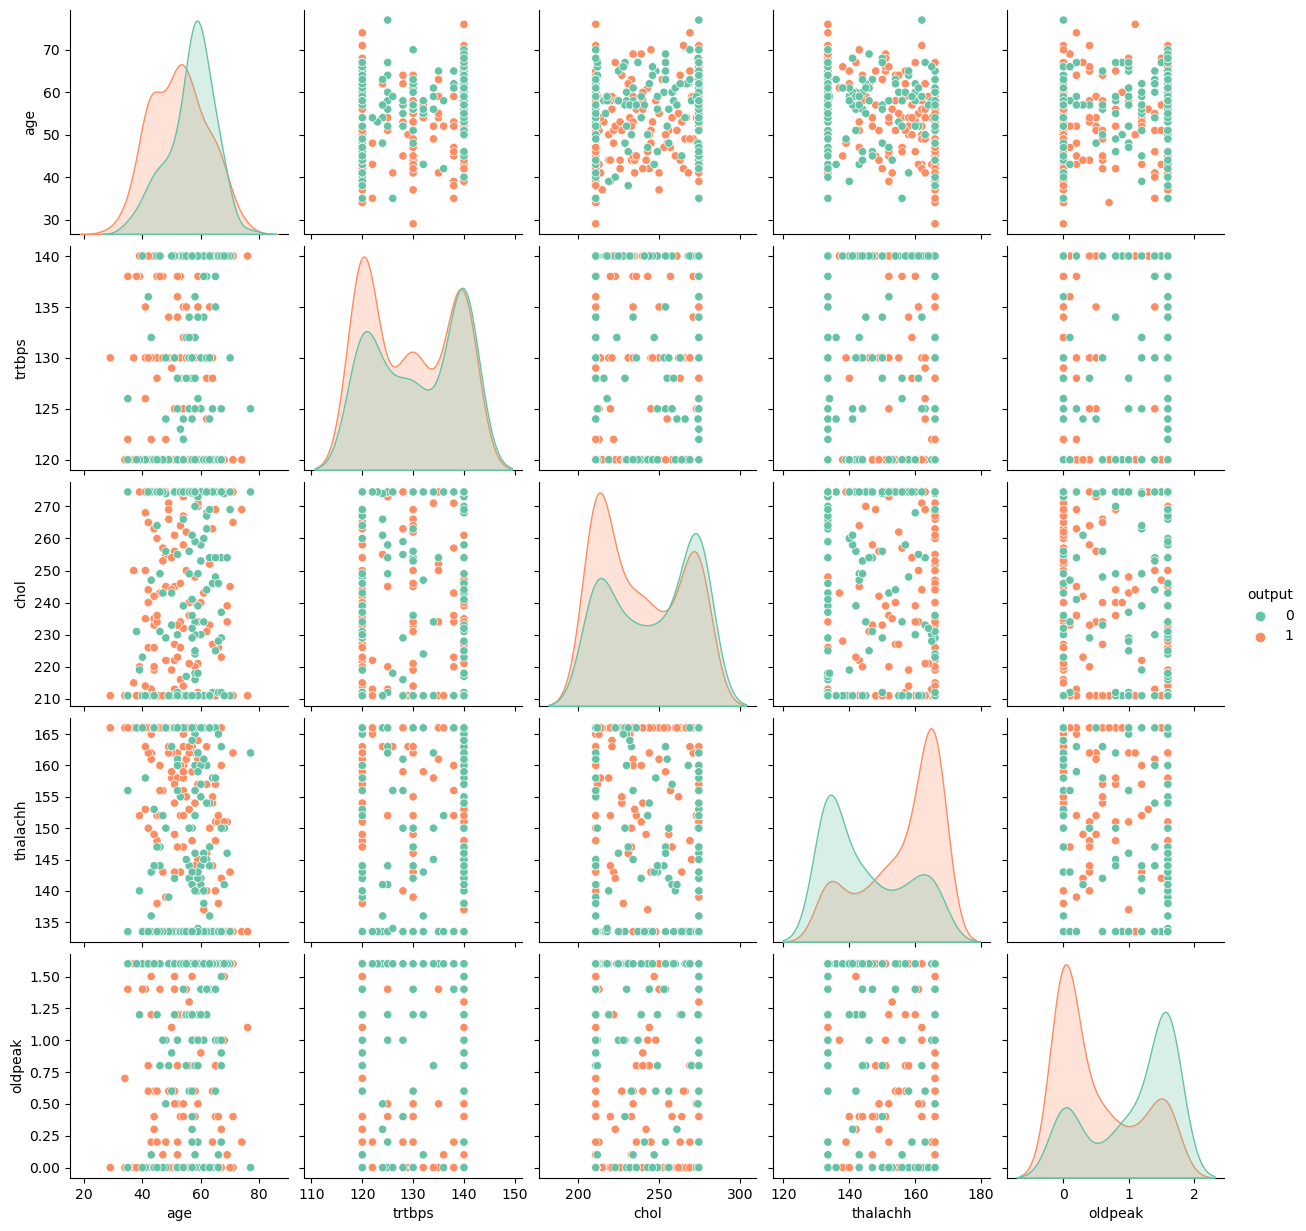

In [35]:
## REPASSAR EL KDE ABANS I DESPRÉS DE TRACTAR ELS OUTLIERS, NO M'ACABA DE CONVÈNCER
## LA IMPUTACIÓ PER Q1 I Q3. UNA VEGADA FET, ELIMINAR AQUESTA CEL·LA, PERÒ DEIXAR
## cols_num_out = cols_numerical.copy() i cols_num_out.append('output')

cols_num_out = cols_numerical.copy()
cols_num_out.append('output')
df_numeric = df.loc[:, cols_num_out]
sns.pairplot(df_numeric, diag_kind = "kde", hue = "output", palette = "Set2")
plt.show()

### Valors extrems 

Es creen uns boxplots per a veure si hi ha valors extrems

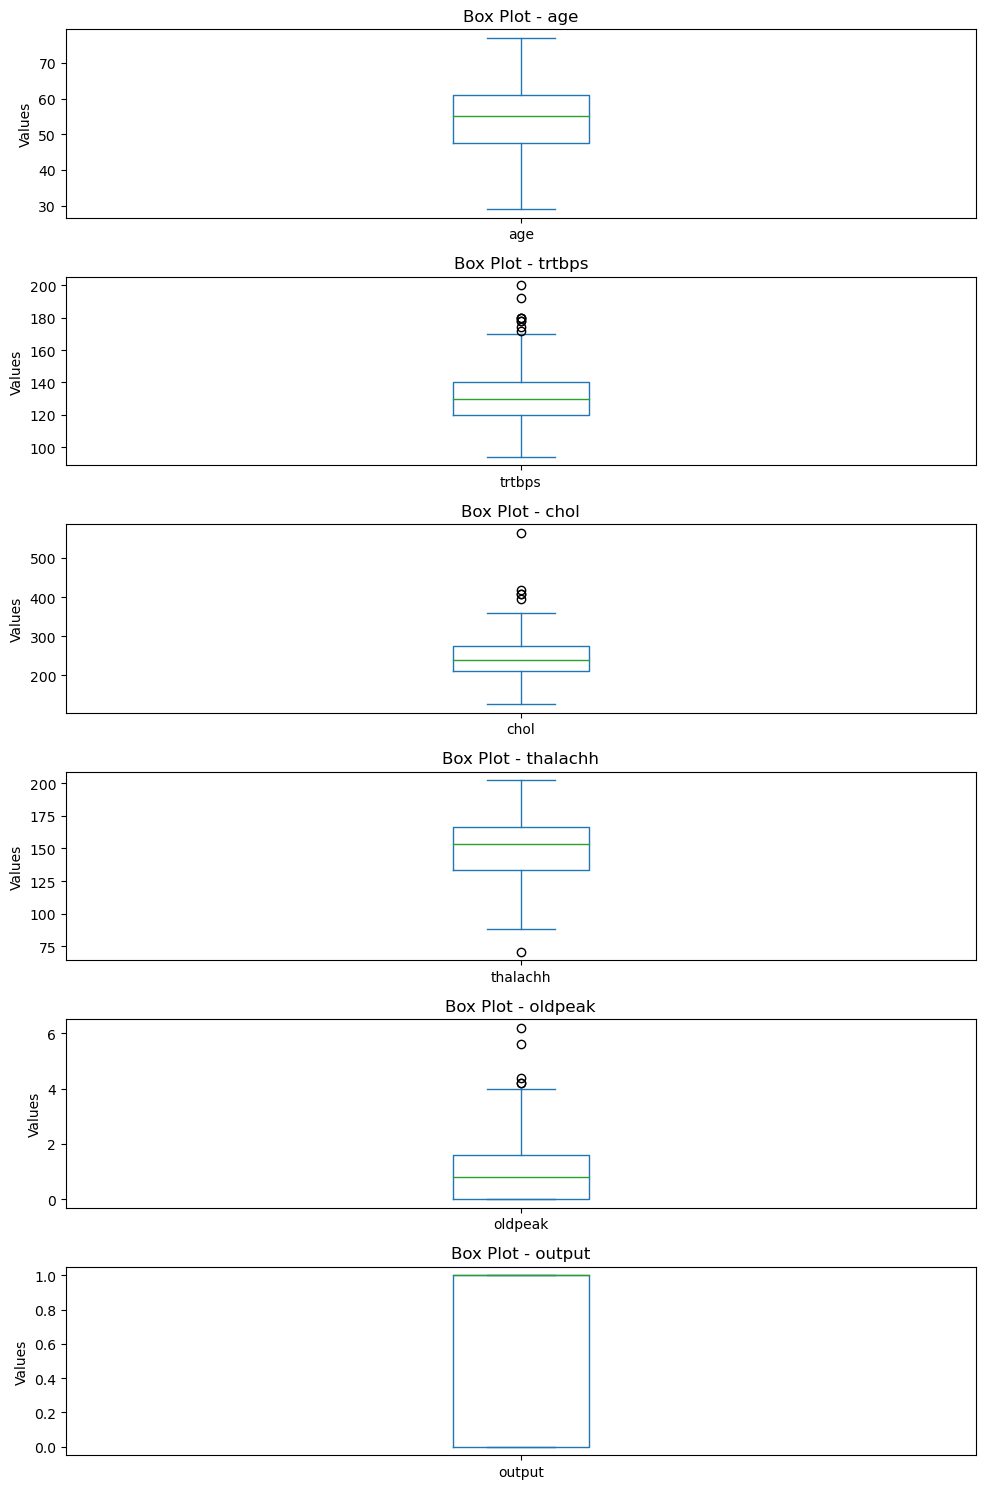

In [10]:
fig, axs = plt.subplots(len(cols_num_out), figsize=(10, 15))

for i, column in enumerate(cols_num_out):
    df[column].plot(kind='box', ax=axs[i])  

    axs[i].set_title(f'Box Plot - {column}')
    axs[i].set_ylabel('Values')
    
plt.tight_layout()
plt.show()

Es pot apreciar que hi ha outliers a trtbps, chol, thalachh i a oldpeak.

In [11]:
## Pel que estic veient, potser és millor no tractar els outliers, o com a mínim
## no fer-ho com ho hem fet

cols_outliers = ['trtbps', 'chol', 'thalachh', 'oldpeak']
def treat_outliers(colum):
    values = df[column].values
    q3 = np.percentile(values, 75)
    q1 = np.percentile(values, 25)
    
    df[column] = np.where(df[column] > q3, q3, df[column])
    df[column] = np.where(df[column] < q1, q1, df[column])

for column in cols_outliers:
    treat_outliers(column)

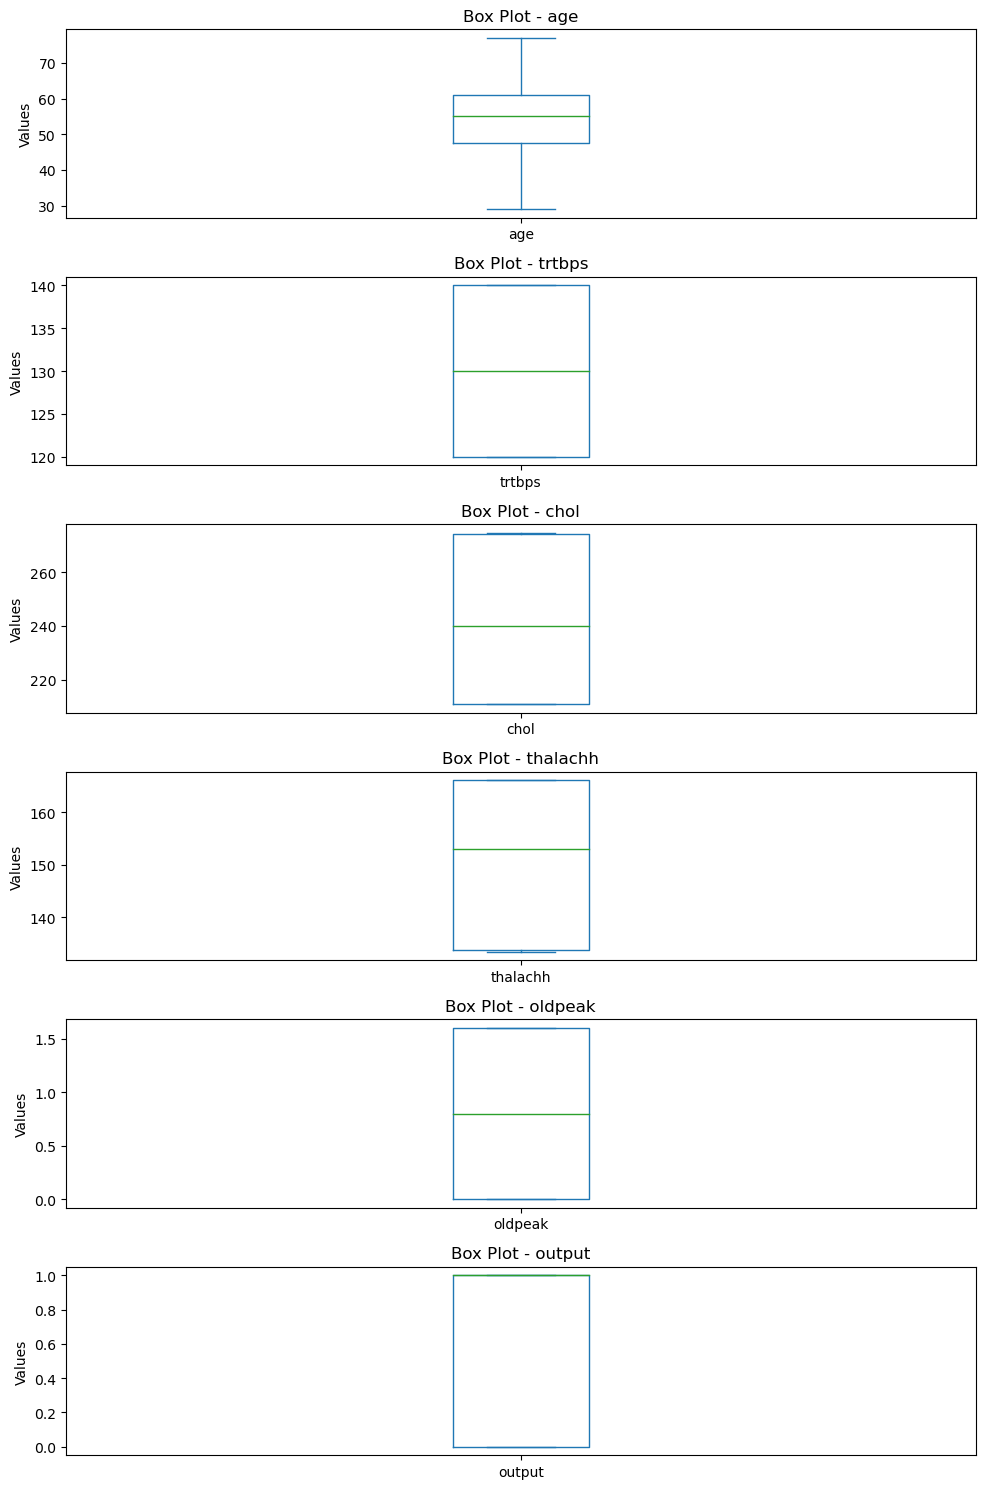

In [12]:
fig, axs = plt.subplots(len(cols_num_out), figsize=(10, 15))

for i, column in enumerate(cols_num_out):
    df[column].plot(kind='box', ax=axs[i])  

    axs[i].set_title(f'Box Plot - {column}')
    axs[i].set_ylabel('Values')
    
plt.tight_layout()
plt.show()

Es pot comprovar que ja no hi ha valors extrems, ja que n'hi havia pocs i no es volien perdre dades, ha que no hi ha molts registres, s'ha optat per a imputar el valor del tercer quartil a valors superiors a aquest i el del primer a valors inferiors a aquest.

## Anàlisi de les dades

Es fa una visualització de kernel density estimate (kde) per a veure la distribució de les variables numèriques.

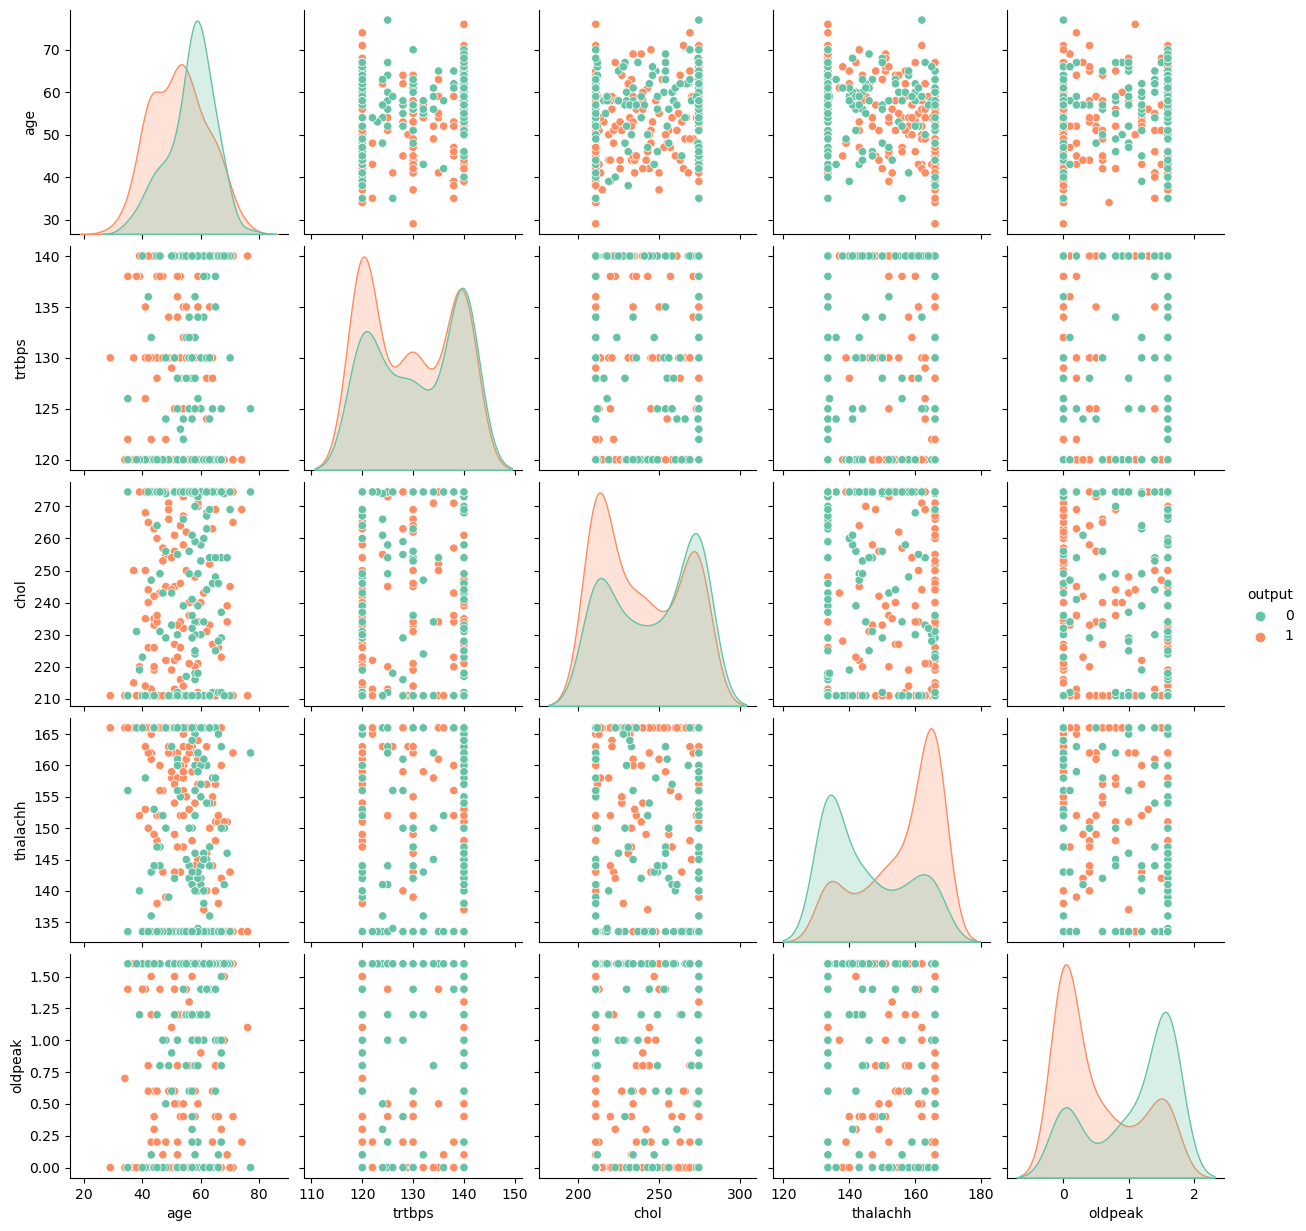

In [37]:
df_numeric = df.loc[:, cols_num_out]
sns.pairplot(df_numeric, diag_kind = "kde", hue = "output", palette = "Set2")
plt.show()

Es creens uns histogrames per a veure la distribució de les variables numèriques

Distribució de age:


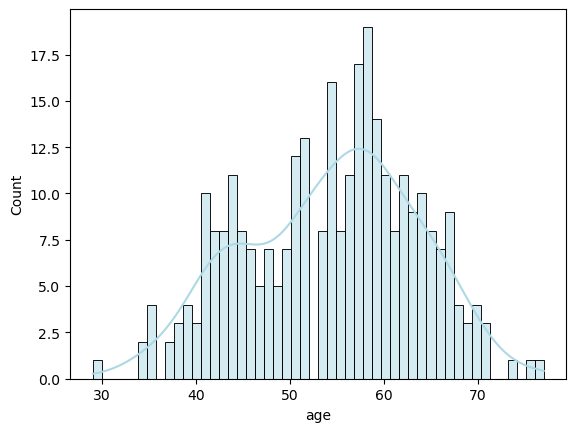

Distribució de trtbps:


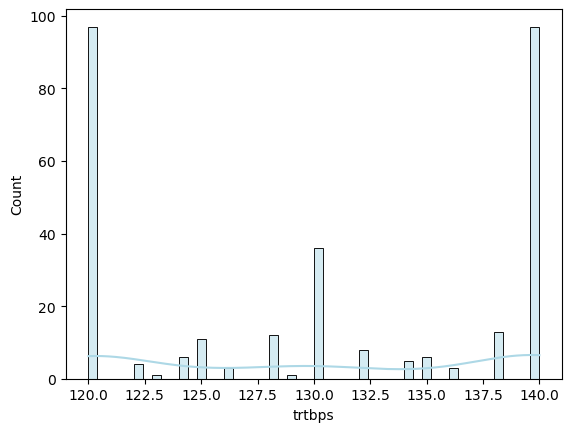

Distribució de chol:


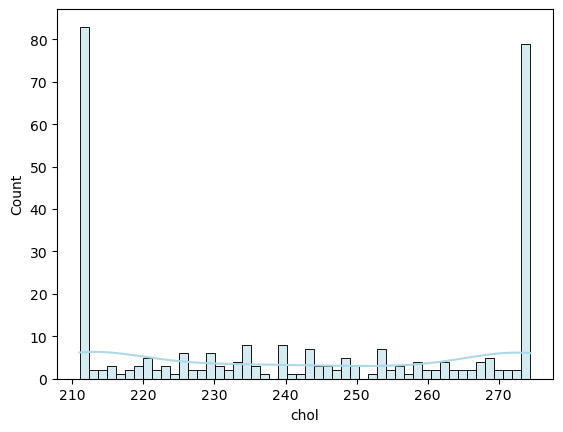

Distribució de thalachh:


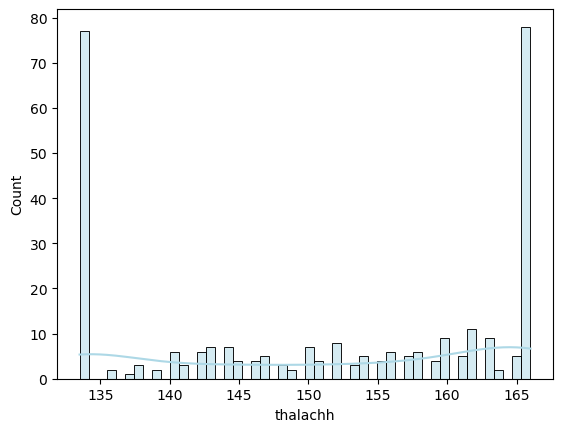

Distribució de oldpeak:


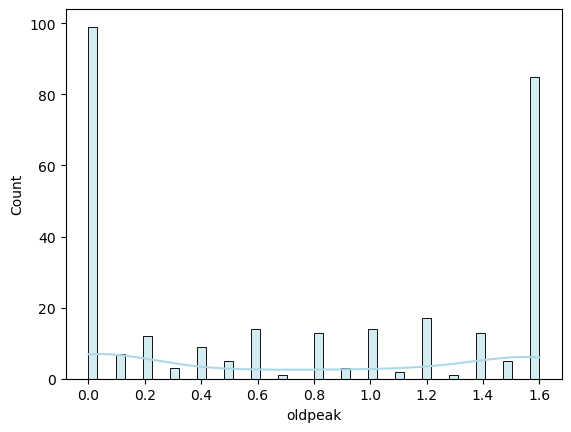

Distribució de output:


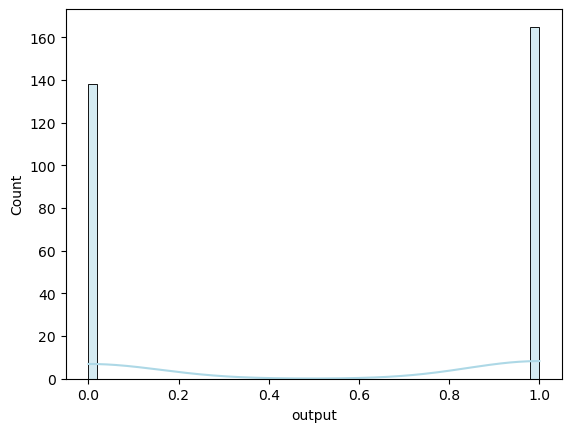

In [31]:
def histogram(num):
    sns.histplot(data = df, x = num, bins = 50, kde = True, color = "lightblue", edgecolor = "black")
    print("Distribució de {}:".format(num))
    plt.show()

for cols in cols_num_out:
    histogram(cols)

Es visualitzen les variables categòriques:

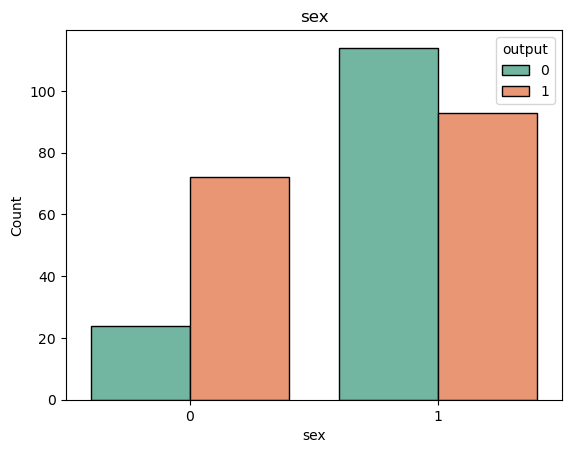

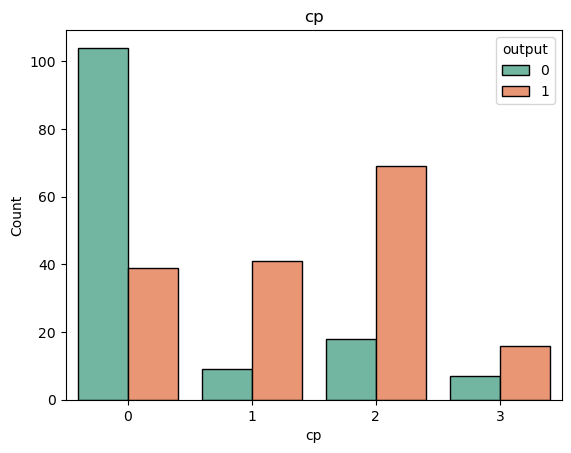

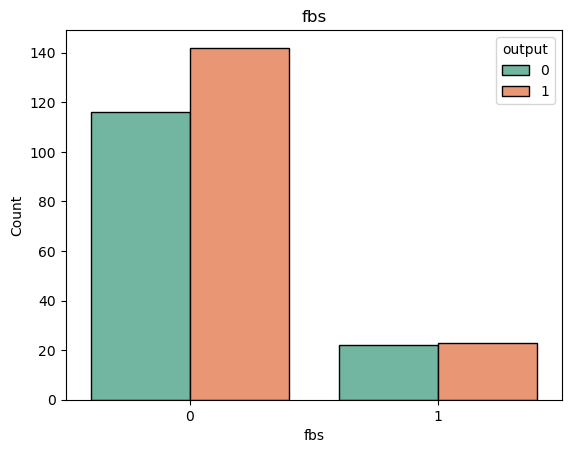

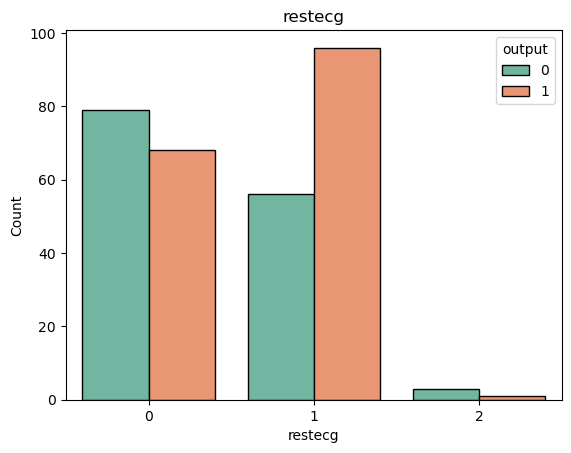

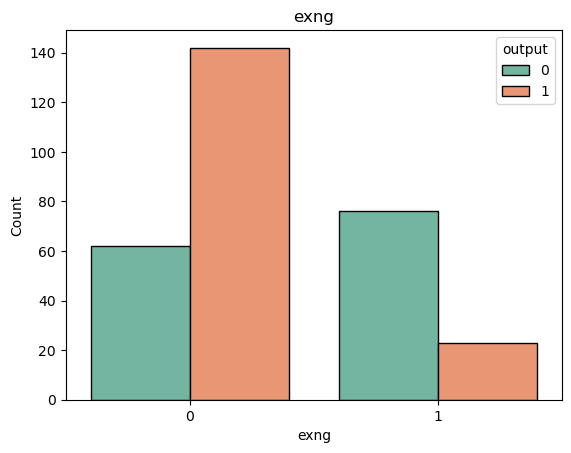

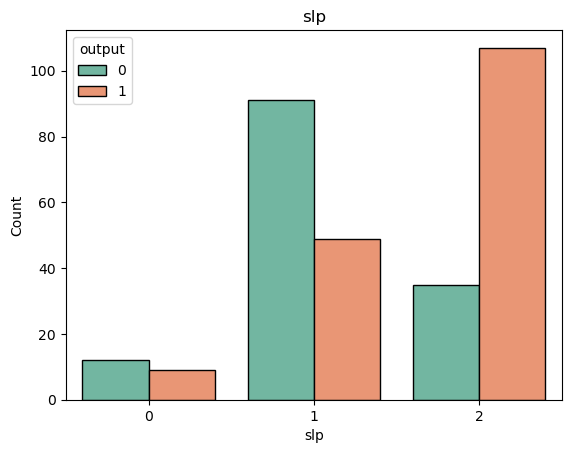

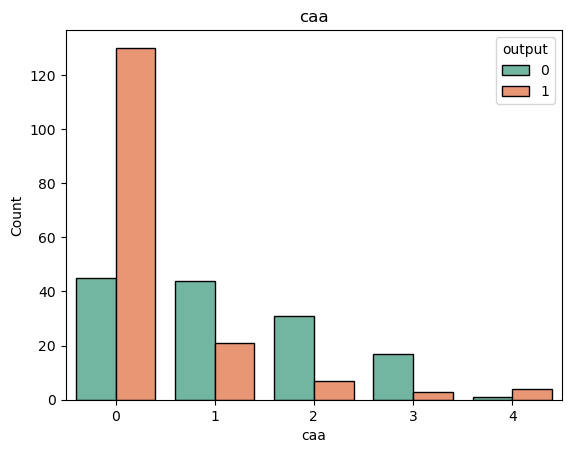

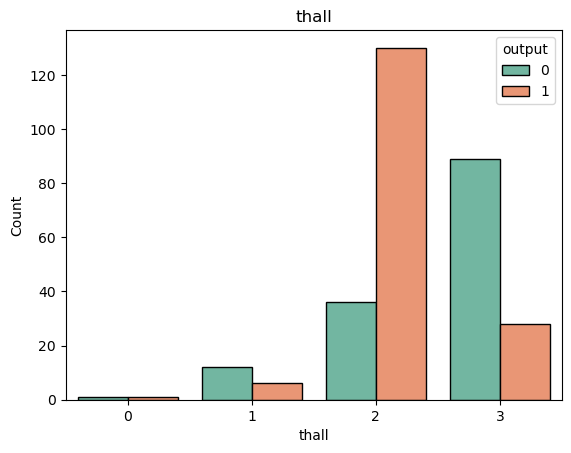

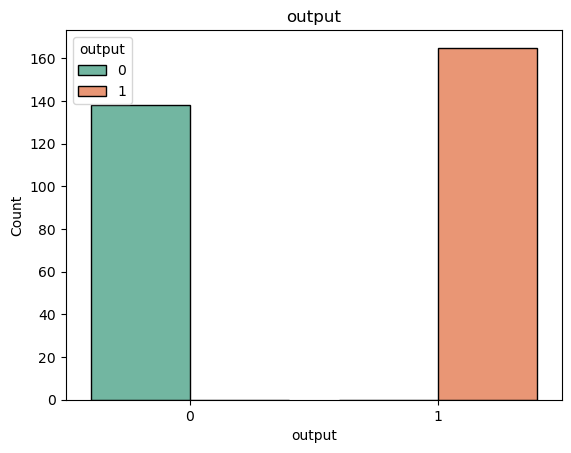

In [34]:
for cols in cols_categorical:
    fig, ax = plt.subplots()
    sns.countplot(ax = ax, data = df, hue = "output", x = df[cols], edgecolor = "Black", palette = "Set2")
    ax.set(ylabel='Count', title=cols)



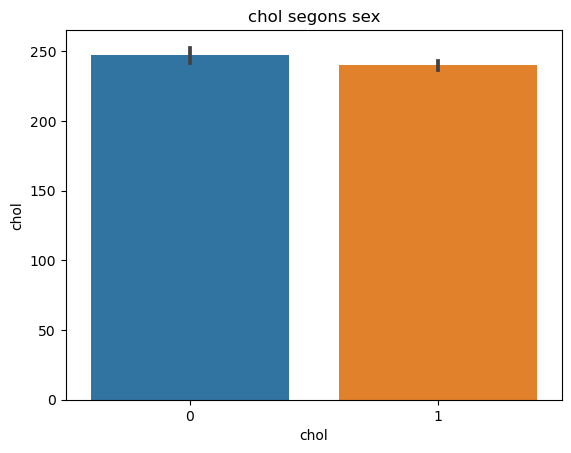

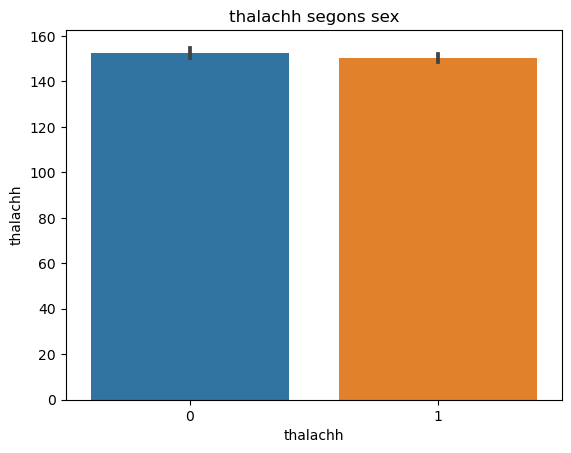

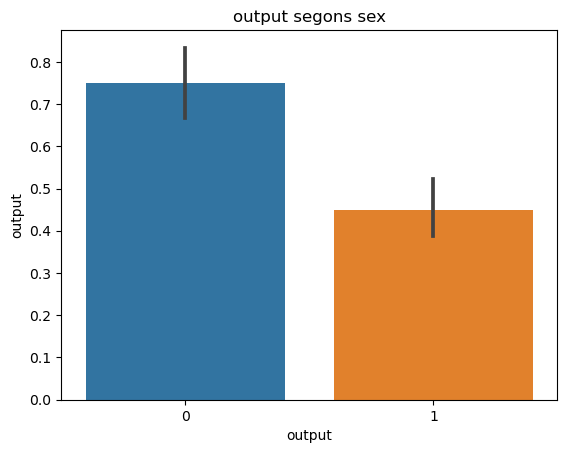

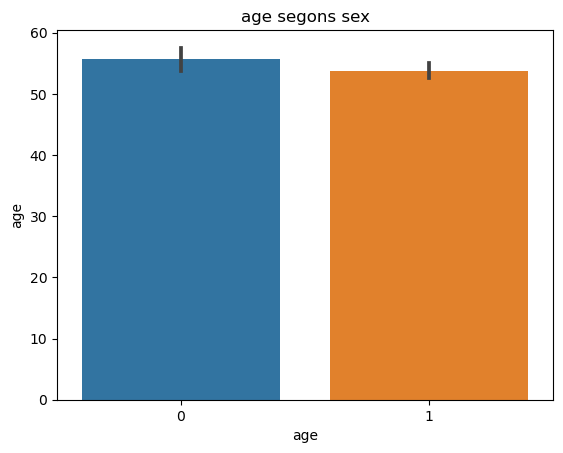

In [41]:
## No acabo de veure si aporta valor aquestes visualitzacions

def distrib_bar(cols):
    sns.barplot(y = cols, x = 'sex', data = df)
    plt.title(f"{cols} segons sex")
    plt.xlabel(cols)
    plt.show()
    
for cols in ['chol', 'thalachh', 'output', 'age']:
    distrib_bar(cols)

Es mira la correlació de les variables:

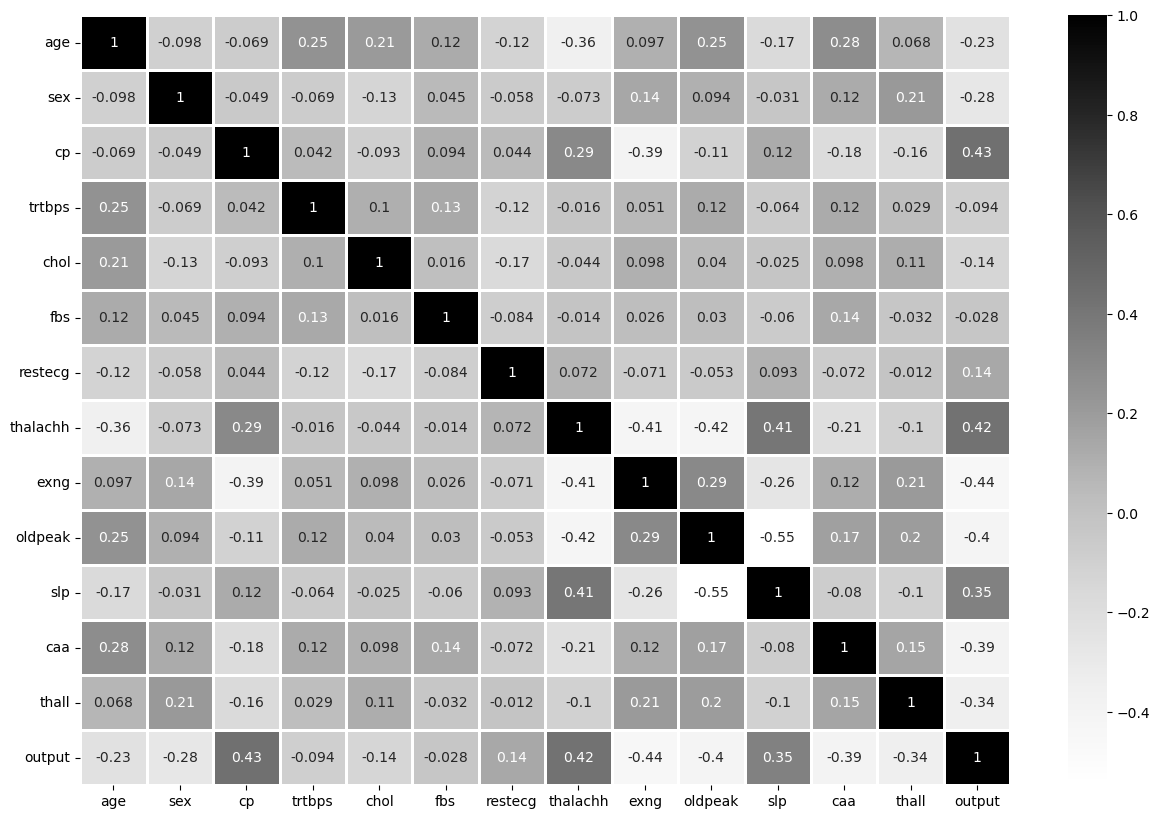

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap="Greys", linewidth = 1)
plt.show()